In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn


In [ ]:
df = pd.read_excel('/content/video_excel.xlsx')
df.sample(5)

,X,Y
192,0.745,89.817198
185,0.262,33.958263
213,0.128,25.730902
13,0.937,131.310152
85,0.319,37.383558


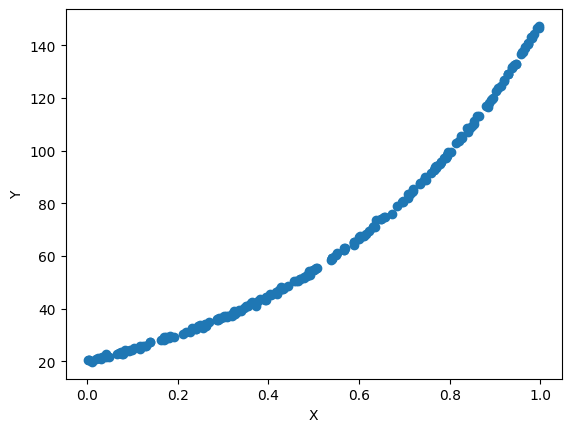

In [ ]:
plt.scatter(df['X'], df['Y'])
plt.xlabel('X')
plt.ylabel('Y')
plt.show();

In [ ]:
X = df['X'].values
Y = df['Y'].values

## Building a custom shallow network

In [ ]:
X = torch.from_numpy(X).view(-1,1)
Y = torch.from_numpy(Y).view(-1,1)

X.shape, Y.shape

(torch.Size([227, 1]), torch.Size([227, 1]))

In [ ]:
class CustomModel(nn.Module):
    def __init__(self):
        super(CustomModel,self).__init__()
        self.w  = nn.Parameter(torch.randn(1,dtype=torch.float64), requires_grad=True)
        self.b  = nn.Parameter(torch.randn(1,dtype=torch.float64), requires_grad=True)

    def forward(self,x):
        return torch.exp(self.w *x + self.b)


In [ ]:
model = CustomModel().double()

In [ ]:
criterion = nn.MSELoss()

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr = 0.0001)

In [ ]:
y_pred_dict = {}
weights_dict = {}
biases_dict  = {}

for epochs in range(300):

    output = model(X)       #### forward pass
    loss   = criterion(output,Y) ### loss calculation
    optimizer.zero_grad()        ### gradients to 0
    loss.backward()              ### backward prop
    optimizer.step()             ### Updated the w and b



    if (epochs) % 5 == 0:
        print(f'Epoch {epochs} Loss : {loss.item()}')
        y_pred_dict[epochs] = output
        weights_dict[epochs] = model.w.item()
        biases_dict[epochs]  = model.b.item()


y_pred_dict[epochs] = output
weights_dict[epochs] = model.w.item()
biases_dict[epochs]  = model.b.item()


Epoch 0 Loss : 5607.989440230884
Epoch 5 Loss : 5569.918781094983
Epoch 10 Loss : 5516.162376162514
Epoch 15 Loss : 5434.748236486337
Epoch 20 Loss : 5297.816586830846
Epoch 25 Loss : 5024.010729296144
Epoch 30 Loss : 4261.574995705842
Epoch 35 Loss : 687.4223487874668
Epoch 40 Loss : 147.38645025334426
Epoch 45 Loss : 93.37013913183047
Epoch 50 Loss : 61.03066999002195
Epoch 55 Loss : 40.849632754269514
Epoch 60 Loss : 27.85732083364945
Epoch 65 Loss : 19.287126949147453
Epoch 70 Loss : 13.52405796406245
Epoch 75 Loss : 9.588384574418154
Epoch 80 Loss : 6.86687054653628
Epoch 85 Loss : 4.965637794075109
Epoch 90 Loss : 3.6262444111918435
Epoch 95 Loss : 2.676072000536888
Epoch 100 Loss : 1.9980993320717375
Epoch 105 Loss : 1.511999102074316
Epoch 110 Loss : 1.1620493096289717
Epoch 115 Loss : 0.9092514759295778
Epoch 120 Loss : 0.7261054734292044
Epoch 125 Loss : 0.5930951800439902
Epoch 130 Loss : 0.49629517920577654
Epoch 135 Loss : 0.4257232223122658
Epoch 140 Loss : 0.374195450819

In [ ]:
predicted = []
epochs    = []
actual    = []
X_val     = []
text      = []
for key,values in y_pred_dict.items():
    values = values.view(1,-1)[0]
    predicted.extend(sorted(values.detach().numpy()))
    epochs.extend([key]*len(values))
    actual.extend(sorted(df['Y'].values.tolist()))
    X_val.extend(sorted(df['X'].values.tolist()))
    text.extend([f'Y = exp({np.round(weights_dict[key],3)}*X + {np.round(biases_dict[key],3)})']*len(values))


ndf = pd.DataFrame(columns=['Epochs','actual','predicted'])
ndf['Epochs'] = epochs
ndf['actual'] = actual
ndf['predicted'] = predicted
ndf['X'] = X_val
ndf['Text'] = text
ndf.head(3)

,Epochs,actual,predicted,X,Text
0,0,19.763667,1.302124,0.003,Y = exp(-0.731*X + 1.028)
1,0,20.437874,1.303094,0.004,Y = exp(-0.731*X + 1.028)
2,0,20.442497,1.306981,0.004,Y = exp(-0.731*X + 1.028)


In [ ]:

import plotly.express as px



fig = px.line(ndf, x='X', y=['actual', 'predicted'],
              animation_frame='Epochs', animation_group='Text',
              template='plotly_dark',
              width=1000, height=600)

# Get unique epochs in the DataFrame
unique_epochs = ndf['Epochs'].unique()

# Update the title for each frame based on epochs
for i, epoch in enumerate(unique_epochs):
    title_text = ndf.loc[ndf['Epochs'] == epoch, 'Text'].iloc[0]
    fig["frames"][i]["layout"]["title"]["text"] = title_text


fig.update_layout(
    title={
        'text': fig.frames[0].layout.title.text,  # Set initial title text
        'x': 0.5,  # Set title position in the middle
        'y': 0.9,  # Adjust vertical position if needed
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 24}  # Set the font size
    }
)

fig.layout.updatemenus[0].buttons[0]['args'][1]['frame']['redraw'] = True
fig.show()
